In [1]:
from pyiron_atomistics import Project
import numpy as np
from atomrdf.build import bulk

from atomrdf.parsers.pyiron import extract, ase_to_pyiron

from atomrdf import KnowledgeGraph
from atomrdf.datamodels.workflow.workflow import Simulation

/home/menonsqr/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/menonsqr/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "id" in "DataProperty" shadows an attribute in parent "TemplateMixin"
  warnings.warn(
/home/menonsqr/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "label" in "DataProperty" shadows an attribute in parent "TemplateMixin"
  warnings.warn(
/home/menonsqr/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "label" in "Method" shadows an attribute in parent "TemplateMixin

In [2]:
project = 't1'
pr = Project(project)
kg = KnowledgeGraph()

In [10]:
structure = bulk('Cu', cubic=True,)# graph=kg)
structure = ase_to_pyiron(structure)

In [11]:
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)
job.structure = structure
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_md(pressure=0, temperature=500)
job.run()

The job j1 was saved and received the ID: 51


In [12]:
structure.info

{}

In [13]:
extracted = extract(job)
extracted

{'id': None,
 'initial_sample': Cu: [0. 0. 0.]
 Cu: [0.    1.805 1.805]
 Cu: [1.805 0.    1.805]
 Cu: [1.805 1.805 0.   ]
 tags: 
     indices: [0 0 0 0]
 pbc: [ True  True  True]
 cell: 
 Cell([3.61, 3.61, 3.61]),
 'final_sample': Cu: [0.05450324 0.02734891 0.00492365]
 Cu: [3.58223022 1.87602646 1.76967254]
 Cu: [1.87246289 3.5578605  1.81958259]
 Cu: [1.73442459 1.78238507 0.02763169]
 tags: 
     indices: [0 0 0 0]
 pbc: [ True  True  True]
 cell: 
 Cell([[3.621810468680124, 2.2177192987937444e-16, 2.2177192987937444e-16], [0.0, 3.621810468680124, 2.217719298793745e-16], [0.0, 0.0, 3.621810468680124]]),
 'method': {'basename': 'MolecularDynamics'},
 'degrees_of_freedom': ['AtomicPositionRelaxation', 'CellVolumeRelaxation'],
 'thermodynamic_ensemble': {'basename': 'IsothermalIsobaricEnsemble'},
 'interatomic_potential': {'potential_type': 'eam',
  'uri': 'https://doi.org/10.1103%2Fphysrevb.63.224106'},
 'xc_functional': {'id': None},
 'workflow_manager': {'uri': 'https://doi.org/10.

In [14]:
sim = Simulation(**extracted)

In [15]:
sim

Simulation(id=None, label=None, pid=None, initial_sample=AtomicScaleSample(id=None, label=None, pid='http://purls.helmholtz-metadaten.de/cmso/AtomicScaleSample', material=Material(id=None, label=None, pid=None, element_ratio=DataProperty[dict](id=None, label=None, value={'Cu': 1.0}, pid=None, unit=None, basename=None), crystal_structure=CrystalStructure(id=None, label=None, pid=None, name=DataProperty[str](id=None, label=None, value=None, pid=None, unit=None, basename=None), spacegroup_symbol=DataProperty[str](id=None, label=None, value=None, pid=None, unit=None, basename=None), spacegroup_number=DataProperty[int](id=None, label=None, value=None, pid=None, unit=None, basename=None), unit_cell=UnitCell(id=None, label=None, pid=None, bravais_lattice=DataProperty[str](id=None, label=None, value=None, pid=None, unit=None, basename=None), lattice_parameter=DataProperty[List[float]](id=None, label=None, value=None, pid=None, unit=None, basename=None), angle=DataProperty[List[float]](id=None,

In [16]:
sim.to_graph(kg)

rdflib.term.URIRef('simulation:88b42e29-0dc2-465d-9e31-a30d5de3cff0')

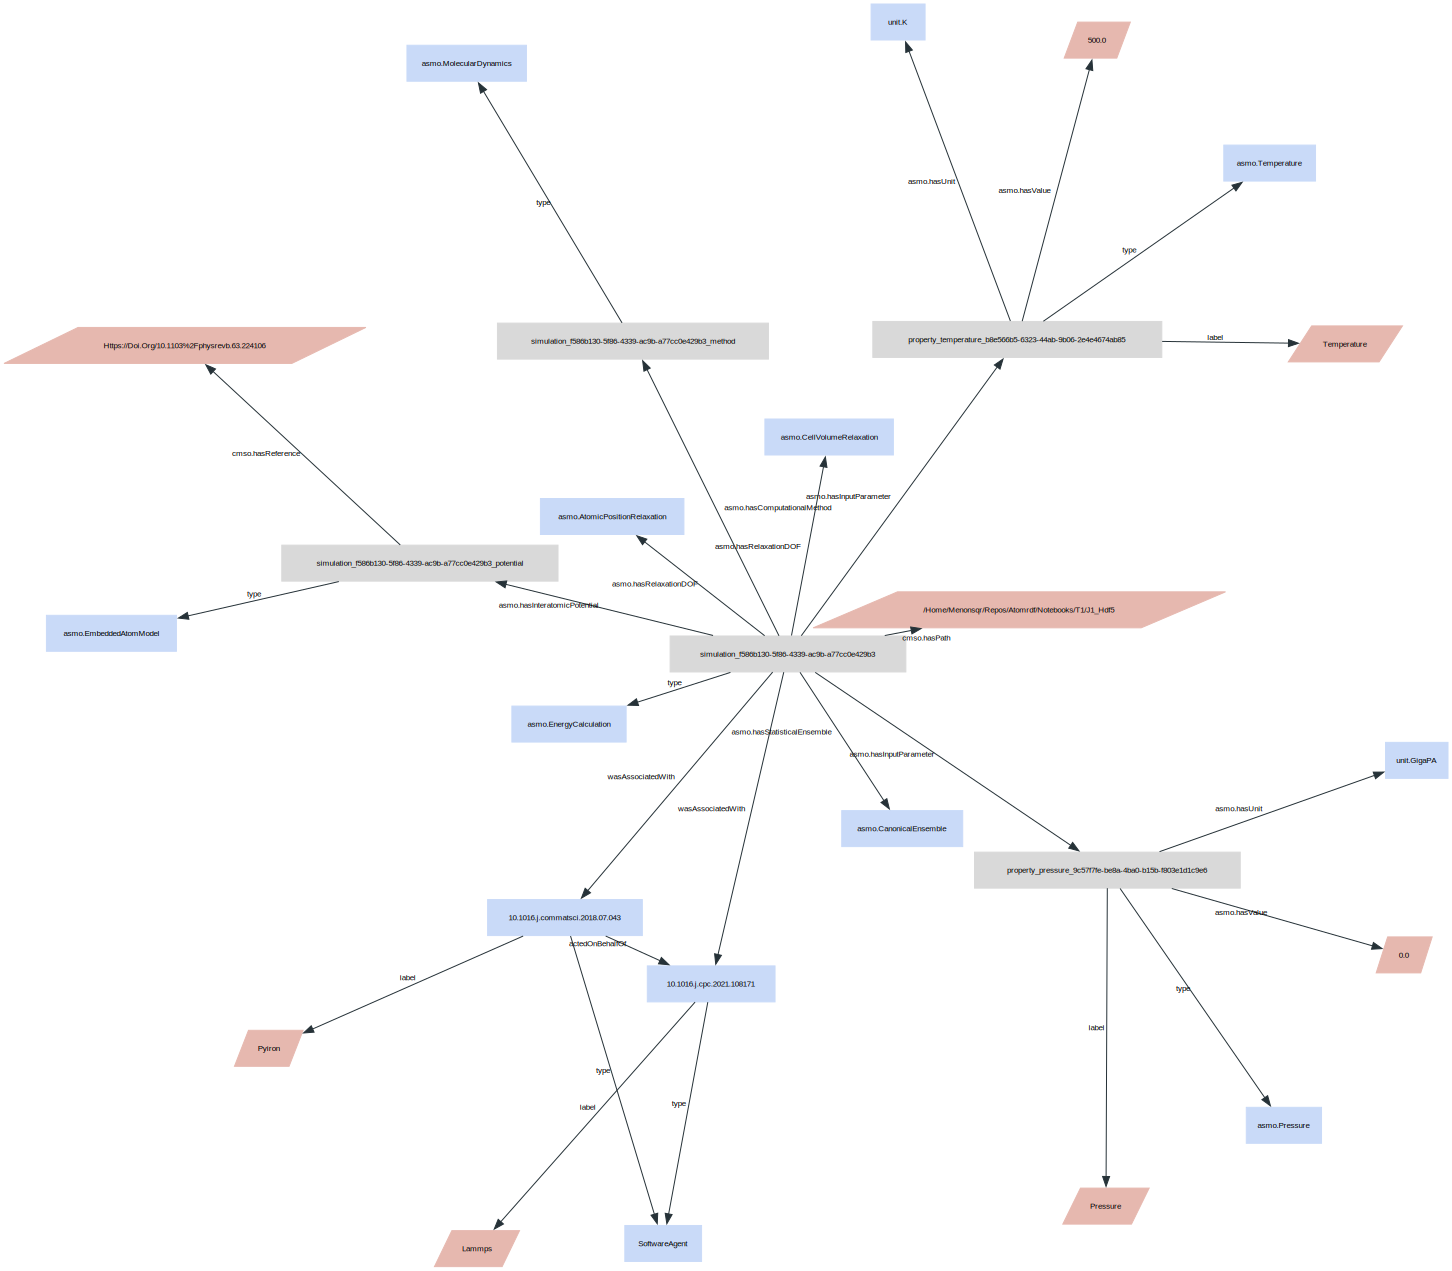

In [9]:
kg.visualise()

In [ ]:

from atomrdf.datamodels.workflow.property import InputParameter, OutputParameter, CalculatedProperty
from atomrdf.datamodels.workflow.software import SoftwareAgent

In [2]:
Simulation.template()

{'id': None,
 'initial_sample': None,
 'final_sample': None,
 'method': {'id': None, 'basename': 'MolecularDynamics'},
 'degrees_of_freedom': [],
 'thermodynamic_ensemble': {'id': None, 'basename': 'CanonicalEnsemble'},
 'interatomic_potential': {'id': None,
  'uri': None,
  'potential_type': 'InteratomicPotential'},
 'xc_functional': {'id': None},
 'workflow_manager': {'id': None, 'uri': None, 'version': None},
 'software': None,
 'input_paramater': [],
 'output_parameter': [],
 'calculated_property': [],
 'path': None}

In [3]:
InputParameter.template()

{'id': None, 'value': None, 'unit': None, 'basename': 'InputParameter'}

In [5]:
SoftwareAgent.template()

{'id': None, 'uri': None, 'version': None}